
**Import all the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

**Import Data**

In [ ]:
#load dataset
data = np.load('ORL_faces.npz') 

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

**Split the Data**


Data is split into training and validation data set to overcome overfitting.

In [ ]:
#5% of the data is used for validation

x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=42,)

**Transform the images to equal sizes to feed in**

In [ ]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (160,)


**Build CNN model: CNN have 3 main layer:**

1-Convolotional layer

2- pooling layer

3- fully connected layer

In [ ]:
#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#we can view our model

cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 43, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 24624)             0         
                                                                 
 dense (Dense)               (None, 2024)              4

**Train the Model**

In [ ]:
#training the model
# we will first start training with 100 epochs

history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=100, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)


Epoch 1/100
1/1 - 10s - loss: 3.0023 - accuracy: 0.0482 - val_loss: 2.9992 - val_accuracy: 0.0833 - 10s/epoch - 10s/step
Epoch 2/100
1/1 - 0s - loss: 3.0112 - accuracy: 0.0526 - val_loss: 3.0022 - val_accuracy: 0.0000e+00 - 122ms/epoch - 122ms/step
Epoch 3/100
1/1 - 0s - loss: 2.9936 - accuracy: 0.0570 - val_loss: 2.9958 - val_accuracy: 0.0000e+00 - 113ms/epoch - 113ms/step
Epoch 4/100
1/1 - 0s - loss: 2.9847 - accuracy: 0.0482 - val_loss: 2.9974 - val_accuracy: 0.0000e+00 - 117ms/epoch - 117ms/step
Epoch 5/100
1/1 - 0s - loss: 3.0042 - accuracy: 0.0526 - val_loss: 2.9984 - val_accuracy: 0.0000e+00 - 117ms/epoch - 117ms/step
Epoch 6/100
1/1 - 0s - loss: 2.9739 - accuracy: 0.1053 - val_loss: 2.9980 - val_accuracy: 0.0000e+00 - 114ms/epoch - 114ms/step
Epoch 7/100
1/1 - 0s - loss: 2.9904 - accuracy: 0.0570 - val_loss: 2.9965 - val_accuracy: 0.0000e+00 - 113ms/epoch - 113ms/step
Epoch 8/100
1/1 - 0s - loss: 3.0088 - accuracy: 0.0351 - val_loss: 2.9972 - val_accuracy: 0.0000e+00 - 114ms/ep

**Evaluate the model**

In [ ]:
score = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(score[0]))
print('test acc {:.4f}'.format(score[1]))

test los 0.3466
test acc 0.9062


our motive is to get accuracy over 90% so we can try training data with more epochs

In [ ]:
#training the model
# we will first start training with 250 epochs

history_1=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)


Epoch 1/250
1/1 - 0s - loss: 0.2044 - accuracy: 0.9474 - val_loss: 0.1749 - val_accuracy: 1.0000 - 200ms/epoch - 200ms/step
Epoch 2/250
1/1 - 0s - loss: 0.1911 - accuracy: 0.9561 - val_loss: 0.2091 - val_accuracy: 0.9167 - 132ms/epoch - 132ms/step
Epoch 3/250
1/1 - 0s - loss: 0.1723 - accuracy: 0.9605 - val_loss: 0.2038 - val_accuracy: 0.9167 - 123ms/epoch - 123ms/step
Epoch 4/250
1/1 - 0s - loss: 0.1419 - accuracy: 0.9649 - val_loss: 0.1886 - val_accuracy: 0.9167 - 118ms/epoch - 118ms/step
Epoch 5/250
1/1 - 0s - loss: 0.1409 - accuracy: 0.9605 - val_loss: 0.1720 - val_accuracy: 0.9167 - 115ms/epoch - 115ms/step
Epoch 6/250
1/1 - 0s - loss: 0.0972 - accuracy: 0.9868 - val_loss: 0.1577 - val_accuracy: 0.9167 - 115ms/epoch - 115ms/step
Epoch 7/250
1/1 - 0s - loss: 0.1415 - accuracy: 0.9605 - val_loss: 0.1492 - val_accuracy: 0.9167 - 115ms/epoch - 115ms/step
Epoch 8/250
1/1 - 0s - loss: 0.1197 - accuracy: 0.9781 - val_loss: 0.1359 - val_accuracy: 0.9167 - 131ms/epoch - 131ms/step
Epoch 9/

In [ ]:
#evaluate the model 
score = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(score[0]))
print('test acc {:.4f}'.format(score[1]))

test los 0.3874
test acc 0.9250


**Plot the Model**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


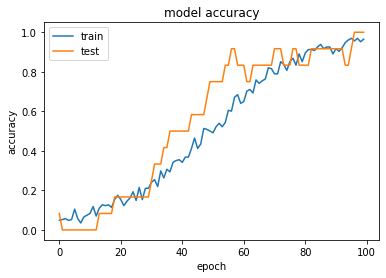

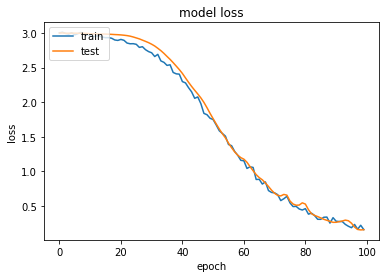

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()